Prendere in analisi solo i valori numerici

\

**1. Analisi Univariata:** cercare e trattare outlier, valori nulli, valori settati a zero.

**2. Analisi Multivariata:** stabilire le relazioni tra le feature e la variabile da predirre. Descrivere le correlazioni del dataset.

**3. Split dei dati**

**4. Scala**

**5. Training**

**6. Training**

\


**Dataset:**
https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv



**Data description:**
https://github.com/FabioGagliardiIts/datasets/raw/main/carprice/carprice_data_dictionary.xlsx

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/carprice/carprice_data.csv')

# Selezionare solo le colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Gestire i valori nulli: sostituire con la media della colonna
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Gestire i valori settati a zero: sostituire con la media della colonna
df[numeric_cols] = df[numeric_cols].replace(0, df[numeric_cols].mean())

# Mostrare il dataframe pulito
display(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


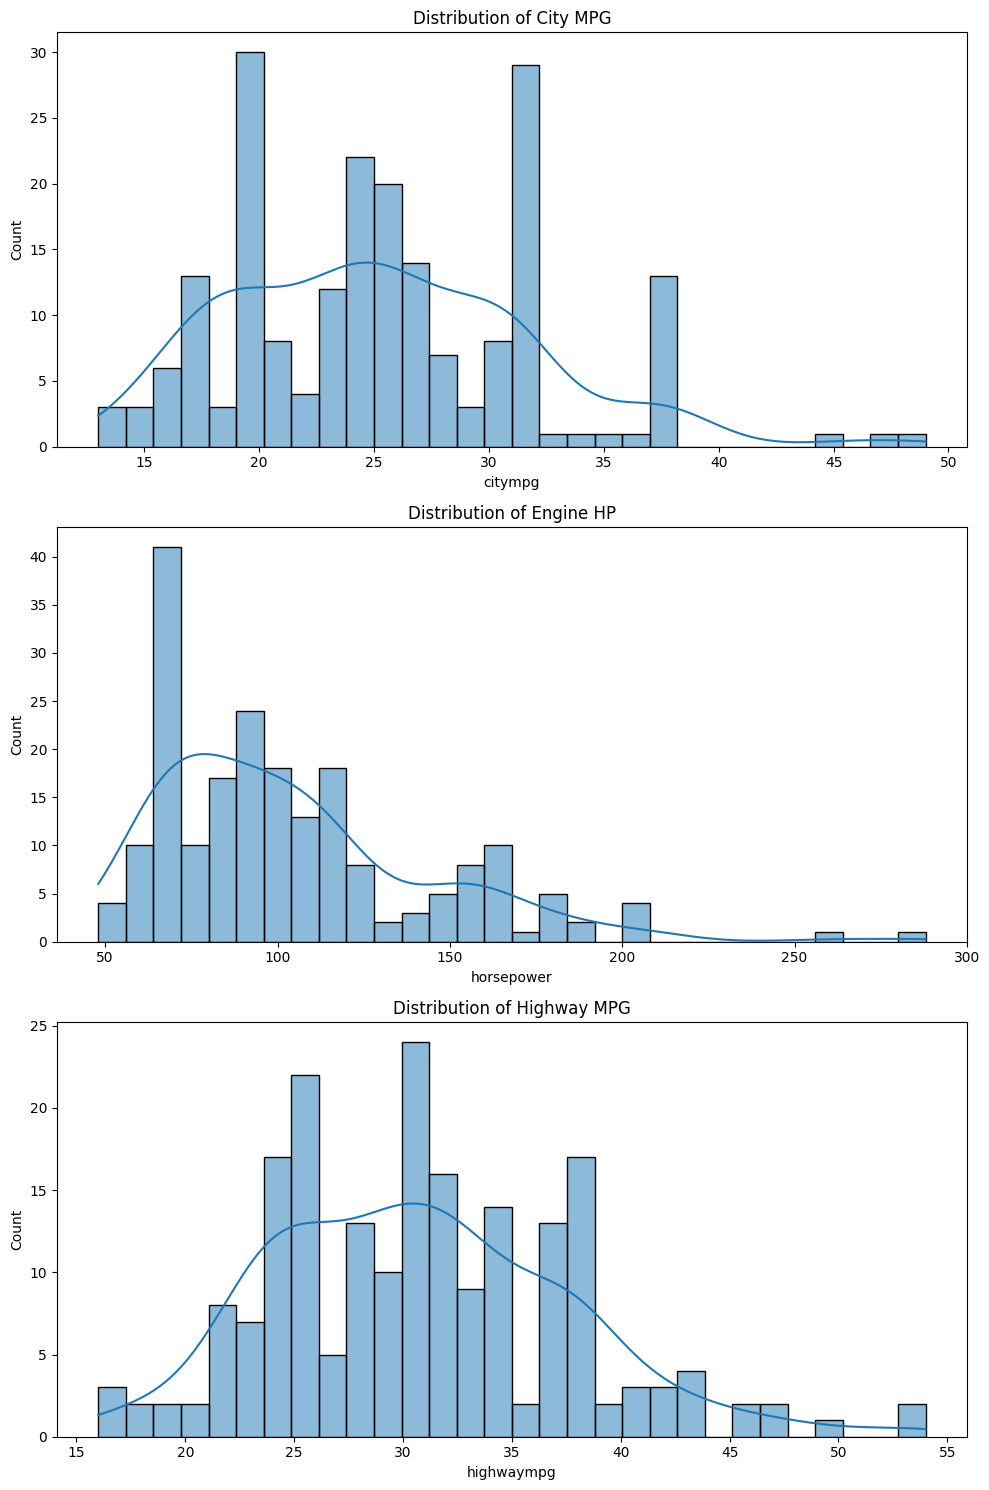

In [ ]:
# Plot distributions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(df['citympg'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of City MPG')

sns.histplot(df['horsepower'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Engine HP')

sns.histplot(df['highwaympg'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Highway MPG')

plt.tight_layout()
plt.show()


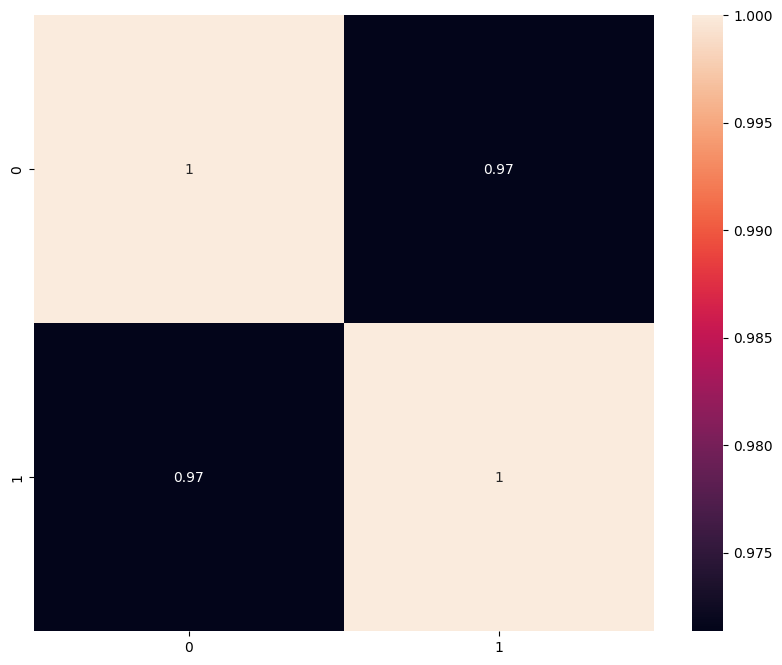

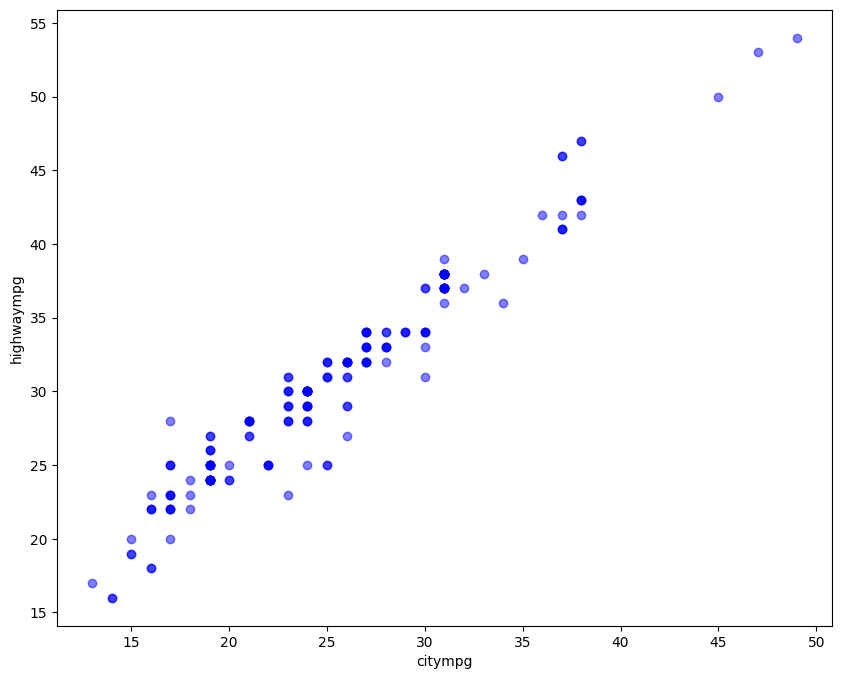

In [ ]:
citympg = df["citympg"].to_numpy()
highwaympg        = df["highwaympg"].to_numpy()

plt.figure(figsize=(10, 8))
corr = np.corrcoef(citympg, highwaympg)
sns.heatmap(corr, annot=True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(citympg, highwaympg, color="blue", alpha=0.5, label="datai")
plt.xlabel("citympg")
plt.ylabel("highwaympg")
plt.show()

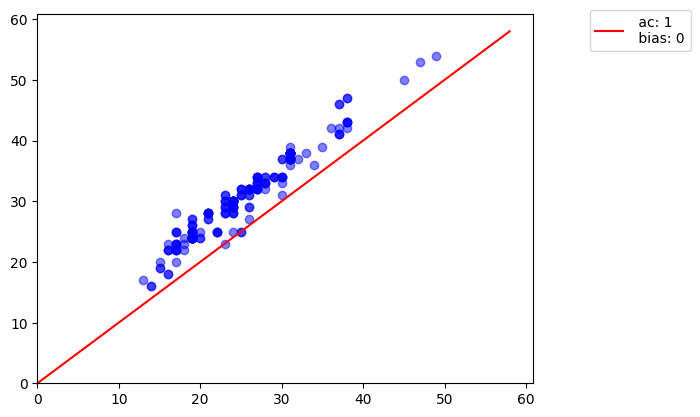

In [ ]:
def linear_equation(x: np.ndarray, a: float, b: float) -> np.ndarray:
  y = (a * x) + b
  return y


def plot_linear_regression(ft: np.ndarray, lbs: np.ndarray, a:float, b: float):
  x = np.arange(np.max(ft + 10))
  y = linear_equation(x, a, b)

  labels = " ac: " + str(a)  + "\n bias: " + str(b)
  plt.plot(x, y, color="red", label=labels)
  plt.scatter(ft, lbs, color="blue", alpha=0.5)
  plt.xlim(0)
  plt.ylim(0)
  plt.legend()
  plt.legend(bbox_to_anchor=(1.1, 1.03))
  plt.show()


plot_linear_regression(citympg, highwaympg, 1, 0)

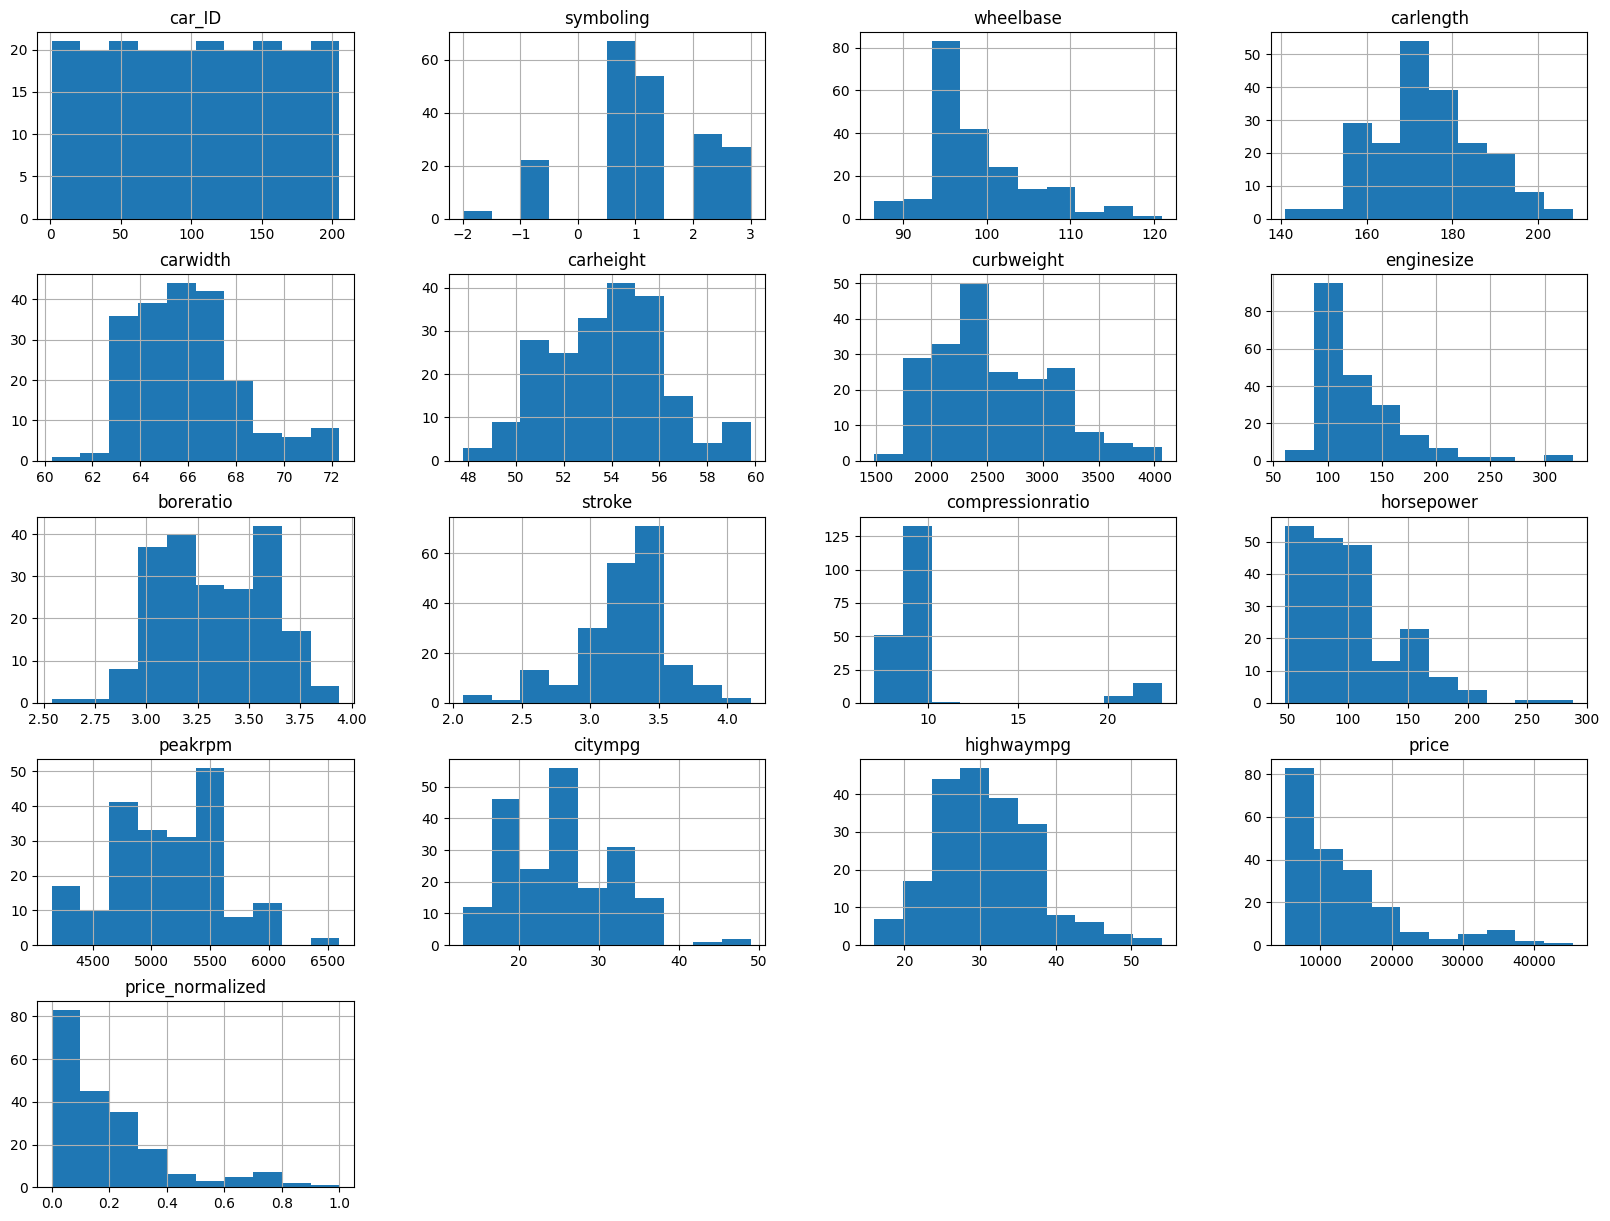

In [ ]:
df.hist(figsize=(20,15))
plt.xlabel("Medie dati dataset")
plt.ylabel("Auto")
plt.title("Car Val Distribution", fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


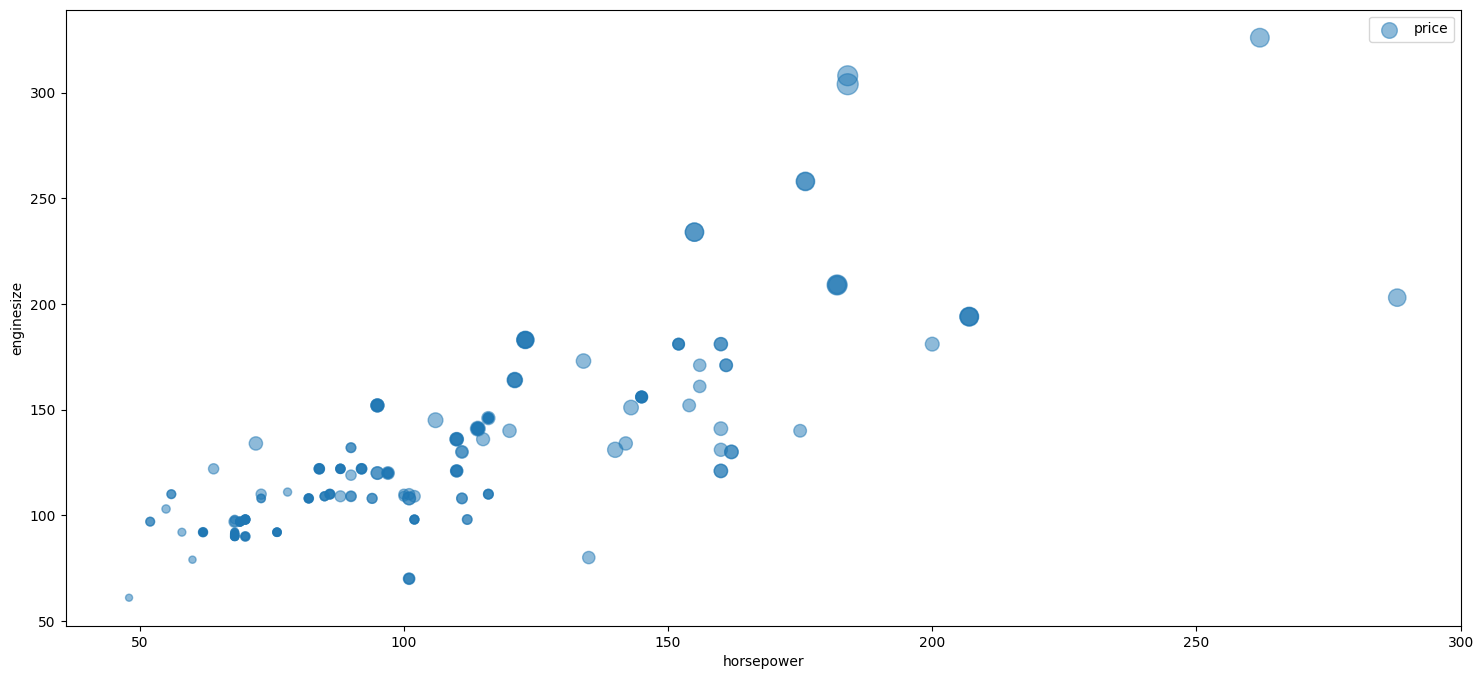

In [ ]:
df.plot(
    kind='scatter',
    x='horsepower',
    y='enginesize',
    alpha=0.5,
    s=df['price'] / 200,
    label='price',
    figsize=(18, 8),
    #c="CarPrice",
    cmap=plt.get_cmap("jet"),
    sharex=False)
plt.legend()
plt.show()

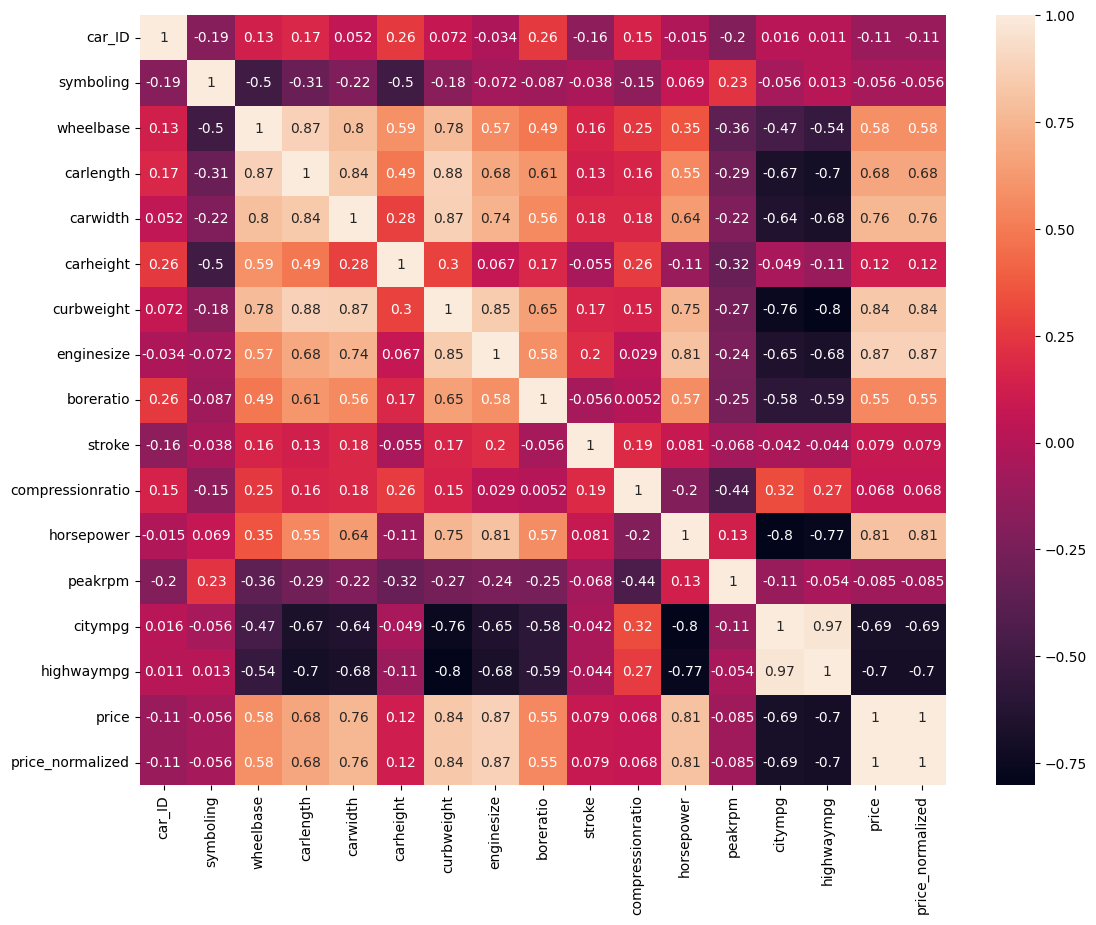

In [ ]:
# Select only numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(13, 10))

sns.heatmap(corr_matrix, annot=True)
plt.show()

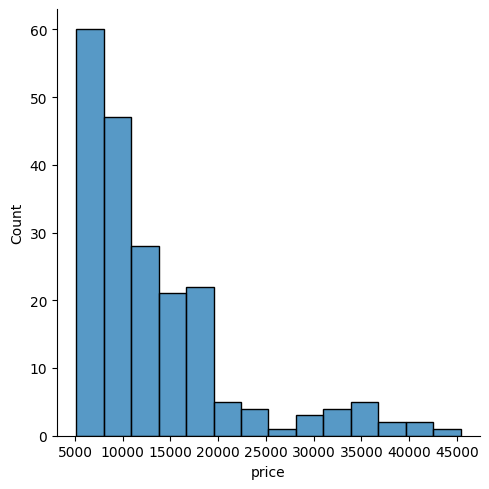

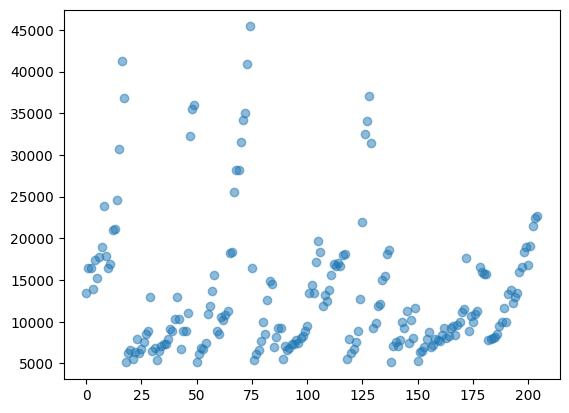

In [ ]:
sns.displot(df["price"])
plt.show()

population = df["price"].to_numpy()

plt.scatter(np.arange(population.size), population, alpha=0.5)
plt.show()

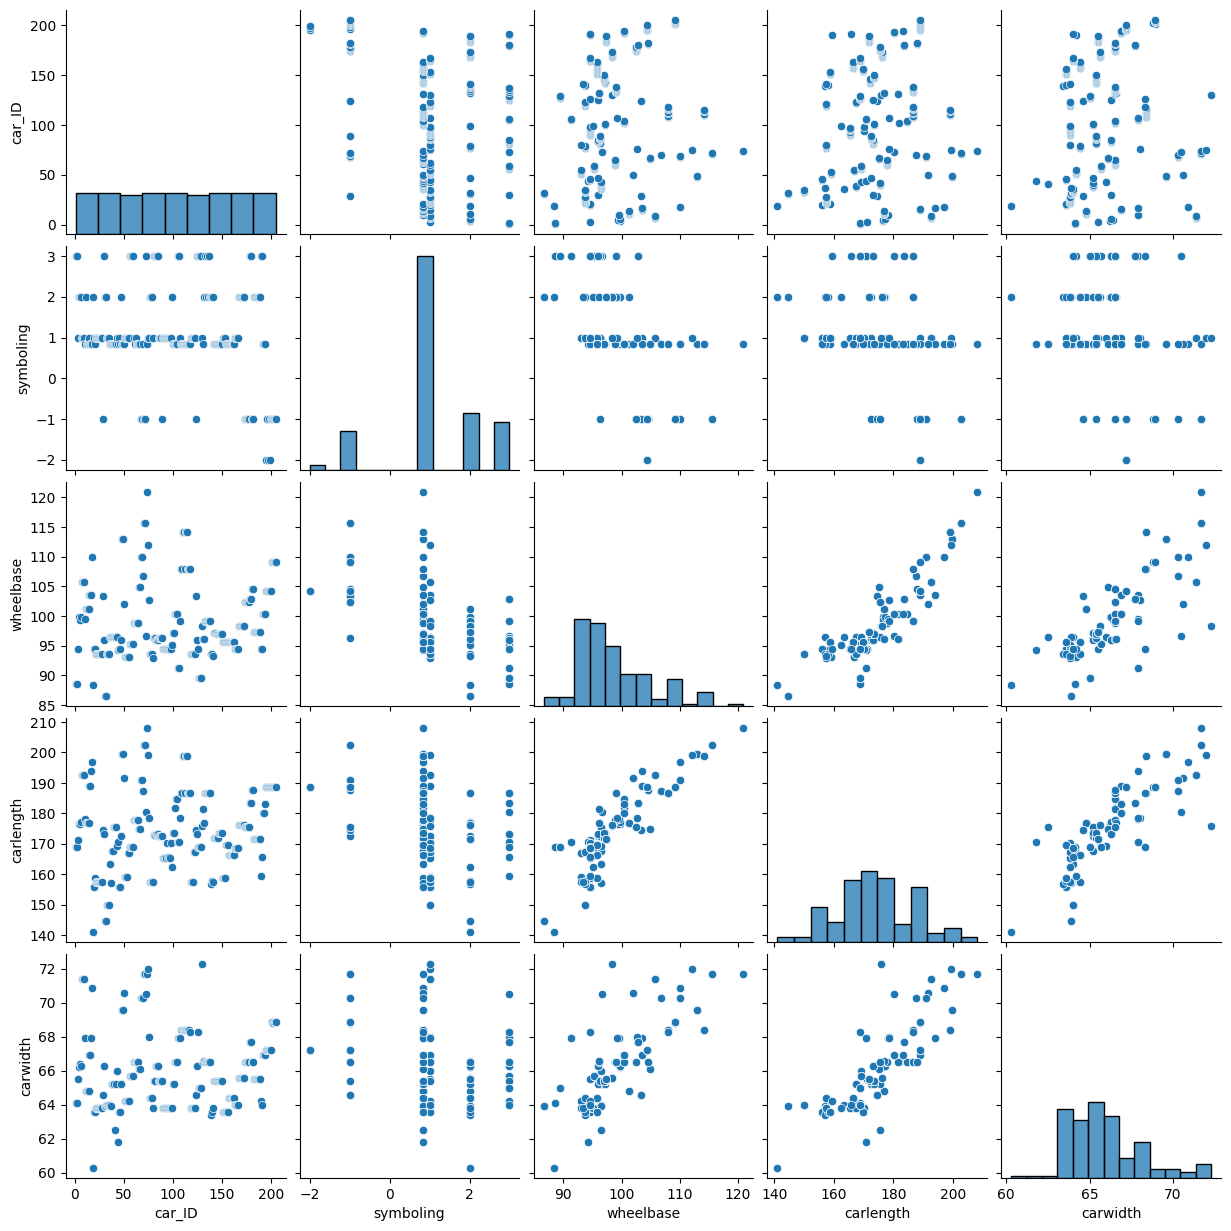

In [ ]:
# Seleziona un sottoinsieme di colonne numeriche per il pairplot
subset_columns = numeric_df.columns[:5]  # Sostituisci con le colonne desiderate
subset_df = numeric_df[subset_columns]

# Pairplot per visualizzare le relazioni tra le variabili selezionate
sns.pairplot(subset_df)
plt.show()
